# Exercise 1

Why is Thompson Sampling asymptotically optimal for the simple multi-armed (Bernoulli) bandit? Outline the argument that TS achieves logarithmic regret in that setting. Then discuss why proving similar guarantees for contextual TS was historically challenging (hint: TS’s random exploration is harder to analyze than UCB’s deterministic optimism).

## Solution

### Thompson Sampling for Bernoulli bandits

#### Setup

There are $K$ arms. Pulling arm $a$ yields $r_t \sim \mathrm{Bernoulli}(\mu_a)$, with unknown $\mu_a\in(0,1)$.
Let $\mu^*=\max_a \mu_a$, and fix an optimal arm $a^*\in\arg\max_a \mu_a$.
Define gaps $\Delta_a:=\mu^*-\mu_a>0$ for $a\neq a^*$.

#### Regret decomposition

Define expected regret:
$$
R_T := T\mu^*-\mathbb E\Big[\sum_{t=1}^T r_t\Big].
$$
Let $N_a(T):=\sum_{t=1}^T \mathbf 1\{a_t=a\}$. Using linearity of expectation and $\mathbb E[r_t\mid a_t=a]=\mu_a$,
$$
R_T=\sum_{a\neq a^*}\Delta_a \mathbb E[N_a(T)].
$$
So it suffices to prove $\mathbb E[N_a(T)]=O(\log T)$ for each suboptimal arm $a$.

 

## 1) Thompson Sampling for Bernoulli rewards

Use independent Beta priors:
$$
\mu_a \sim \mathrm{Beta}(\alpha_{a,0},\beta_{a,0}).
$$
After $S_a(t)$ successes and $F_a(t)$ failures observed on arm $a$ up to time $t$,
$$
\mu_a\mid \mathcal H_t \sim \mathrm{Beta}(\alpha_{a,0}+S_a(t),\beta_{a,0}+F_a(t)).
$$
At round $t$, TS samples $\tilde\mu_a(t)$ from each posterior and plays
$$
a_t \in \arg\max_a \tilde\mu_a(t),
$$
then updates only the chosen arm’s posterior.

 

## 2) Why “asymptotically optimal” is the right benchmark

Lai–Robbins (Bernoulli case) implies for any uniformly good algorithm and any suboptimal arm $a$,
$$
\liminf_{T\to\infty}\frac{\mathbb E[N_a(T)]}{\log T}\ge \frac{1}{\mathrm{kl}(\mu_a,\mu^*)},
$$
where
$$
\mathrm{kl}(p,q)=p\log\frac pq+(1-p)\log\frac{1-p}{1-q}.
$$
Hence the best possible scaling is $\mathbb E[N_a(T)]\approx \frac{\log T}{\mathrm{kl}(\mu_a,\mu^*)}$, and an algorithm is asymptotically optimal if it matches this constant for every suboptimal arm.

 > Note: In the Lai–Robbins lower bound above, a **uniformly good** algorithm is one that is not just good for a single problem instance, but **works well across all instances** (all possible mean vectors $mu = (mu_1, ..., mu_K)$, in the sense that it does not incur polynomial (or linear) regret on any instance.
 

## 3) Logarithmic regret for TS: the key argument

Fix a suboptimal arm $a\neq a^*$. Choose a threshold
$$
\mu_a < x < \mu^*.
$$

### 3.1 Reduce “TS plays arm $a$” to two tail events

If TS plays $a$ at time $t$, then $\tilde\mu_a(t)\ge \tilde\mu_{a^*}(t)$.
In particular, it cannot happen that simultaneously $\tilde\mu_a(t)<x$ and $\tilde\mu_{a^*}(t)>x$.
So
$$
\{a_t=a\}\subseteq \{\tilde\mu_a(t)\ge x\}\ \cup\ \{\tilde\mu_{a^*}(t)\le x\},
$$
and therefore
$$
\mathbb P(a_t=a)\le \mathbb P(\tilde\mu_a(t)\ge x)+\mathbb P(\tilde\mu_{a^*}(t)\le x).
$$
Summing over $t\le T$,
$$
\mathbb E[N_a(T)] = \sum_{t=1}^T \mathbb P(a_t=a)
\le \sum_{t=1}^T \mathbb P(\tilde\mu_a(t)\ge x) + \sum_{t=1}^T \mathbb P(\tilde\mu_{a^*}(t)\le x).
$$
So we must show these tail sums are at most $O(\log T)$ (for the suboptimal arm term) and $O(1)$ or at most $O(\log T)$ for the optimal arm term, with the right constants.

 

### 3.2 The technical core: Beta posterior tails decay like $\exp(-n\times \mathrm{kl})$

#### (i) Posterior after $n$ pulls

Suppose arm $a$ has been pulled $n$ times, with $S$ successes and $F=n-S$ failures. Then
$$
\tilde\mu_a(t)\mid (S,F)\ \sim\ \mathrm{Beta}(A,B),
\quad A:=\alpha_{a,0}+S,\; B:=\beta_{a,0}+F.
$$
Let $p:=S/n$ be the empirical mean.

#### (ii) Beta tail = Binomial tail (exact identity)

For integers $A,B\ge 1$, if $U\sim \mathrm{Beta}(A,B)$ and $m:=A+B-1$, then for any $x\in(0,1)$,
$$
\mathbb P(U\ge x)=\mathbb P(\mathrm{Bin}(m,x)\le A-1).
$$
Here $m=A+B-1=n+(\alpha_{a,0}+\beta_{a,0}-1)=n+O(1)$: **the Binomial has $n$ plus a constant number of trials**, so its large-$n$ exponent is governed by $n$.

*(Intuition in one line: $U\sim\mathrm{Beta}(A,B)$ is the $A$-th order statistic of $m$ uniforms; $U\ge x$ means at most $A-1$ uniforms fall below $x$, a Binomial count.)*

#### (iii) Binomial tails have KL exponents

If $Y\sim \mathrm{Bin}(m,x)$ and $0\le \tau \le x$, then
$$
\mathbb P\Big(\frac{Y}{m}\le \tau\Big)\ \le\ \exp\big(-m\ \mathrm{kl}(\tau,x)\big).
$$
Apply this with $\tau\approx \frac{A-1}{m}\approx \frac{S}{n}=p$ to get the **conditional** bound
$$
\mathbb P(\tilde\mu_a(t)\ge x\mid S,F)
\ \le\ \exp\big(-(n+O(1))\ \mathrm{kl}(p,x)\big).
$$
This is the precise statement: **conditional on the empirical mean $p$**, the posterior upper tail is exponentially small at rate $\mathrm{kl}(p,x)$.

#### (iv) Replace $p$ by $\mu_a$ using a “good event + bad event” split

You cannot directly claim $\mathbb P(\tilde\mu_a\ge x\mid N=n)\approx e^{-n\mathrm{kl}(\mu_a,x)}$ because conditioning only on $N=n$ averages over all $S$.

Instead, fix $\varepsilon>0$ such that $\mu_a+\varepsilon<x$, and split:

* **Good empirical event:** $p\le \mu_a+\varepsilon$.
* **Bad empirical event:** $p> \mu_a+\varepsilon$.

On the good event, monotonicity of KL in its first argument (for $p<x$) gives
$$
\mathrm{kl}(p,x)\ \ge\ \mathrm{kl}(\mu_a+\varepsilon,x),
$$
hence
$$
\mathbb P(\tilde\mu_a\ge x\mid S,F)\ \le\ \exp\big(-(n+O(1))\ \mathrm{kl}(\mu_a+\varepsilon,x)\big).
$$
The bad empirical event is itself exponentially unlikely by Chernoff:
$$
\mathbb P(p>\mu_a+\varepsilon)\ \le\ \exp\big(-n\ \mathrm{kl}(\mu_a+\varepsilon,\mu_a)\big).
$$
Combine by total probability:
$$
\mathbb P(\tilde\mu_a\ge x\mid N=n)
\ \le
\exp\big(-(n+O(1))\ \mathrm{kl}(\mu_a+\varepsilon,x)\big)
+
\exp\big(-n\ \mathrm{kl}(\mu_a+\varepsilon,\mu_a)\big).
$$
This is the accurate version of “posterior tails decay like $e^{-n\times \mathrm{KL}}$”.

A symmetric argument gives for the optimal arm $a^*$, for $x<\mu^*$,
$$
\mathbb P(\tilde\mu_{a^*}\le x\mid N_{a^*}=n^*)
\ \le
\exp\big(-(n^*+O(1))\ \mathrm{kl}(x,\mu^*-\varepsilon)\big)
+
\exp\big(-n^*\ \mathrm{kl}(\mu^*-\varepsilon,\mu^*)\big).
$$

 
---

### **3.2 Beta Posterior Tails Decay Like $\exp(-n \times \mathrm{KL})$**


#### **(i) Posterior after $n$ pulls**

Suppose arm $a$ has been pulled $n$ times, with $S$ successes and $F=n-S$ failures. Then
$$
\tilde\mu_a(t)\mid (S,F)\ \sim\ \mathrm{Beta}(A,B),
\quad A:=\alpha_{a,0}+S,\; B:=\beta_{a,0}+F.
$$
Let $p:=S/n$ be the empirical mean.

> **Note:** What is $\tilde\mu_a(t)$?  
> This is the **random sample** drawn from the posterior distribution of arm $a$'s unknown success probability. Thompson Sampling uses this draw to decide whether to pull the arm again. It is **not** the true mean $\mu_a$ (which is fixed and unknown), nor the empirical mean $p$ (which is observed but random). It is a *sampled belief*.

> **Note:** Key Distinction: $p$ vs $\mu_a$  
> - $p = S/n$ = **observed** average (random, data-dependent)  
> - $\mu_a$ = **true** average (fixed, unknown)  
> - The proof must bridge between these two.

---

#### **(ii) Beta tail = Binomial tail**

For integers $A,B\ge 1$, if $U\sim \mathrm{Beta}(A,B)$ and $m:=A+B-1$, then for any $x\in(0,1)$,
$$
\mathbb P(U\ge x)=\mathbb P(\mathrm{Bin}(m,x)\le A-1).
$$
Here $m=A+B-1=n+(\alpha_{a,0}+\beta_{a,0}-1)=n+O(1)$: **the Binomial has $n$ plus a constant number of trials**, so its large-$n$ exponent is governed by $n$.

> **Note:** Why does this identity hold?   
> Think of generating $m$ independent Uniform$(0,1)$ random variables and sorting them: $U_{(1)} \le U_{(2)} \le \dots \le U_{(m)}$. The $A$-th smallest one, $U_{(A)}$, follows $\mathrm{Beta}(A,B)$.  
> - The event $U_{(A)} \ge x$ means: "The $A$-th smallest uniform is at least $x$."  
> - This can only happen if **at most $A-1$ uniforms fall below $x$** (otherwise the $A$-th smallest would be $< x$).  
> - The count of uniforms below $x$ is $\mathrm{Bin}(m,x)$. Hence, $\mathbb{P}(U_{(A)} \ge x) = \mathbb{P}(\mathrm{Bin}(m,x) \le A-1)$.

> **Note:** Why the inequality flips direction?  
> "$U$ is larger than $x$" **iff** "the Binomial count is smaller than $A-1$".  
> The direction is inherent to the order-statistics interpretation.

---

#### **(iii) Binomial tails have KL exponents**

If $Y\sim \mathrm{Bin}(m,x)$ and $0\le \tau \le x$, then
$$
\mathbb P\Big(\frac{Y}{m}\le \tau\Big)\ \le\ \exp\big(-m\ \mathrm{kl}(\tau,x)\big).
$$
Apply this with $\tau\approx \frac{A-1}{m}\approx \frac{S}{n}=p$ to get the **conditional** bound
$$
\mathbb P(\tilde\mu_a(t)\ge x\mid S,F)
\ \le\ \exp\big(-(n+O(1))\ \mathrm{kl}(p,x)\big).
$$

> **Note:** Why "conditional on $p$"?  
> The bound still depends on the **observed** $p = S/n$, which is random. It hasn't yet anchored to the **true** $\mu_a$. That's why we need the next step.

---

#### **(iv) Replace $p$ by $\mu_a$ using a "good event + bad event" split**

You cannot directly claim $\mathbb P(\tilde\mu_a\ge x\mid N=n)\approx e^{-n\mathrm{kl}(\mu_a,x)}$ because conditioning only on $N=n$ averages over all $S$. Conditioning on (N=n) leaves (S) random; the posterior tail depends on (S); therefore you cannot “freeze” the exponent at (\mu) without controlling the probability of atypical (S).

Instead, fix $\varepsilon>0$ such that $\mu_a+\varepsilon<x$, and split:

* **Good empirical event ($\mathcal{G}$):** $p\le \mu_a+\varepsilon$.
* **Bad empirical event ($\mathcal{B}$):** $p> \mu_a+\varepsilon$.

> **Note:** What is the G event?  
> $\mathcal{G}$ is: *"The observed empirical mean $p$ is close to the true mean $\mu_a$ (within $\varepsilon$)."* 

On the good event, **monotonicity of KL** in its first argument (for $p<x$) gives
$$
\mathrm{kl}(p,x)\ \ge\ \mathrm{kl}(\mu_a+\varepsilon,x),
$$
hence
$$
\mathbb P(\tilde\mu_a\ge x\mid S,F)\ \le\ \exp\big(-(n+O(1))\ \mathrm{kl}(\mu_a+\varepsilon,x)\big).
$$

> **Note:** Why does KL monotonicity give this?  
> The function $\tau \mapsto \mathrm{kl}(\tau, x)$ is **strictly decreasing** for $\tau < x$. Since $p \le \mu_a + \varepsilon < x$, we have $\mathrm{kl}(p, x) \ge \mathrm{kl}(\mu_a + \varepsilon, x)$. A smaller first argument means a larger KL divergence, thus a tighter bound.

The bad empirical event is itself exponentially unlikely by Chernoff:
$$
\mathbb P(p>\mu_a+\varepsilon)\ \le\ \exp\big(-n\ \mathrm{kl}(\mu_a+\varepsilon,\mu_a)\big).
$$

Combine by **total probability**:
$$
\mathbb P(\tilde\mu_a\ge x\mid N=n)
\ \le
\exp\big(-(n+O(1))\ \mathrm{kl}(\mu_a+\varepsilon,x)\big)
+
\exp\big(-n\ \mathrm{kl}(\mu_a+\varepsilon,\mu_a)\big).
$$

> **Note:** Why don't we see $\mathbb{P}(\mathcal{B})$ multiplied by something?  
> By the product rule: $\mathbb{P}(\tilde\mu_a \ge x, \mathcal{B}) = \mathbb{P}(\tilde\mu_a \ge x \mid \mathcal{B}) \cdot \mathbb{P}(\mathcal{B})$.  
> We **aggressively bound** $\mathbb{P}(\tilde\mu_a \ge x \mid \mathcal{B}) \le 1$ (since probabilities are ≤ 1). This is valid because the **rarity of $\mathcal{B}$** already makes the product small. Multiplying by ≤ 1 would only make it smaller, but we don't need that precision.

This is the accurate version of "posterior tails decay like $e^{-n\times \mathrm{KL}}$."

A symmetric argument gives for the optimal arm $a^*$, for $x<\mu^*$,
$$
\mathbb P(\tilde\mu_{a^*}\le x\mid N_{a^*}=n^*)
\ \le
\exp\big(-(n^*+O(1))\ \mathrm{kl}(x,\mu^*-\varepsilon)\big)
+
\exp\big(-n^*\ \mathrm{kl}(\mu^*-\varepsilon,\mu^*)\big).
$$

---

### **3.3 Convert exponential tails into $O(\log T)$ pulls**

Define the critical pull count (for fixed $x\in(\mu_a,\mu^*)$):
$$
n_a(T):=\frac{\log T}{\mathrm{kl}(\mu_a,x)}.
$$

> **Note:** Intuition for $n_a(T)$: This is the number of pulls where the tail probability becomes roughly $1/T$. Set $\exp(-n \cdot \mathrm{kl}(\mu_a, x)) = 1/T$ and solve for $n$.

Decompose pulls of arm $a$:
$$
\mathbb E[N_a(T)] = \mathbb E[N_a(T)\wedge n_a(T)]
+
\mathbb E[(N_a(T)-n_a(T))_+]
\ \le\ n_a(T)+ \mathbb E[(N_a(T)-n_a(T))_+].
$$

> **Note:** What does this decomposition mean?  
> - $N_a(T) \wedge n_a(T) = \min(N_a(T), n_a(T))$ counts pulls **up to the critical threshold**. This is ≤ $n_a(T)$ trivially.  
> - $(N_a(T) - n_a(T))_+ = \max(N_a(T) - n_a(T), 0)$ counts **excess pulls beyond the threshold**. This is what we must bound.

For the excess term, we omit the proof but here is the high level justification: each pull beyond $n_a(T)$ requires TS to select arm $a$ at some time when it has already been sampled at least $n_a(T)$ times. At such times, the bound above yields (choosing $\varepsilon$ small) that 
$$
\mathbb P(\tilde\mu_a(t)\ge x\mid N_a(t-1)\ge n_a(T))
\lesssim T^{-1}\quad \text{(up to polynomial/log factors and a summable error)}.
$$

> **Note:** Why can we use the bound at exactly $n_a(T)$?  
> The tail bound is **decreasing in $n$** (more data = less optimism). If $N_a(t-1) \ge n_a(T)$, the true probability is **even smaller** than at $n_a(T)$. Using the bound at the threshold is a **conservative upper bound**.

Summing over $t\le T$ makes the expected number of “extra” selections bounded by a constant:
$$
\mathbb E[(N_a(T)-n_a(T))_+] = O(1).
$$

> **Note:** Summing over $T$ times: Each excess pull has probability ≤ $1/T$. Over $T$ rounds, the expected total is ≤ $T \cdot (1/T) = O(1)$. The $O(1)$ dominates any polynomial/log factors.

Therefore,
$$
\mathbb E[N_a(T)]\ \le\ \frac{\log T}{\mathrm{kl}(\mu_a,x)} + O(1).
$$

---

### **3.4 Recover the Lai–Robbins constant**

Let $x\uparrow \mu^*$. By continuity of $\mathrm{kl}(\mu_a,x)$ in $x$,
$$
\mathrm{kl}(\mu_a,x)\to \mathrm{kl}(\mu_a,\mu^*),
$$
so
$$
\mathbb E[N_a(T)]\ \le\ \frac{\log T}{\mathrm{kl}(\mu_a,\mu^*)} + o(\log T).
$$
Plugging into the regret decomposition gives
$$
R_T = \sum_{a\neq a^*}\Delta_a \mathbb E[N_a(T)]
= O(\log T),
$$
and the leading constants match Lai–Robbins (asymptotic optimality).

---

### **Memorable Summary Table**

| Symbol | Meaning | Key Property |
|--------|---------|--------------|
| $\tilde\mu_a(t)$ | **Sampled belief** from posterior | Random, drives TS decisions |
| $p = S/n$ | **Empirical** success rate | Random, observed data |
| $\mu_a$ | **True** success rate | Fixed, unknown, target of learning |
| $x$ | **Danger threshold** $(\mu_a, \mu^*)$ | Fixed analyst choice |
| $\mathcal{G}$ | **Good event** $p \le \mu_a + \varepsilon$ | Data is truthful, error rare |
| $\mathcal{B}$ | **Bad event** $p > \mu_a + \varepsilon$ | Data is misleading, also rare |
| $n_a(T)$ | **Critical pulls** $\log T / \mathrm{kl}(\mu_a, x)$ | After this, mistakes are $O(1/T)$ |



# Exercise 2

Implement Linear Thompson Sampling using a Bayesian linear regression approach. Assume a Gaussian prior on $\theta$ for each arm and update posteriors with incoming rewards. Test it vs. LinUCB on a synthetic contextual bandit where rewards have a 100-step delay (i.e., you only observe reward 100 time steps after the action). Which algorithm’s performance degrades more, and why?

## Solution

Below is a minimal Linear Thompson Sampling (Bayesian linear regression) implementation and a delayed-feedback simulator. We compare against LinUCB from Day 1 using a block-feature trick so each arm has its own parameter vector.

Avg reward (last 200 steps)
LinUCB delay=0  : 1.4926776255987209
LinUCB delay=100: 1.4926776255987209
TS delay=0      : 1.4926360454721737
TS delay=100    : 1.4926776255987209


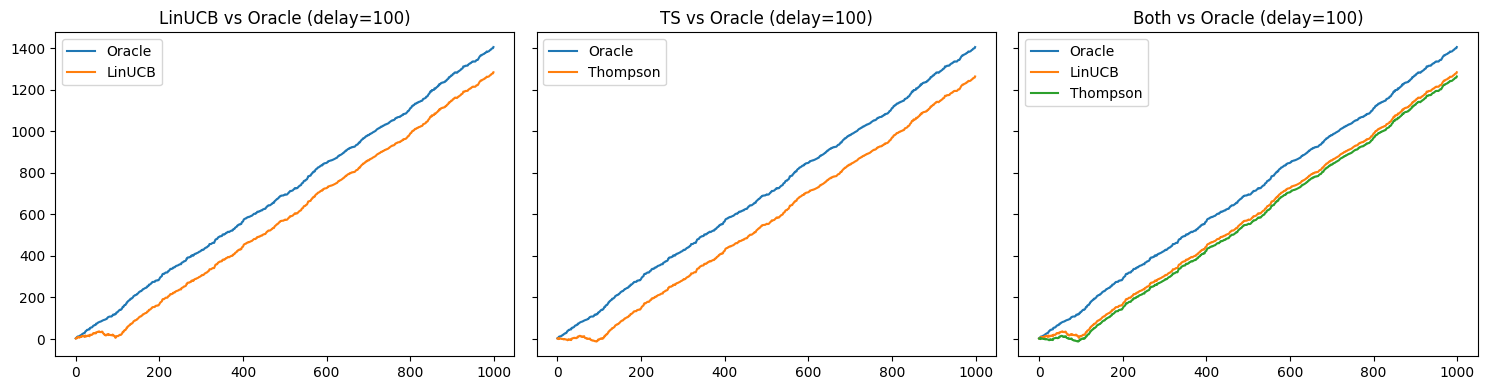

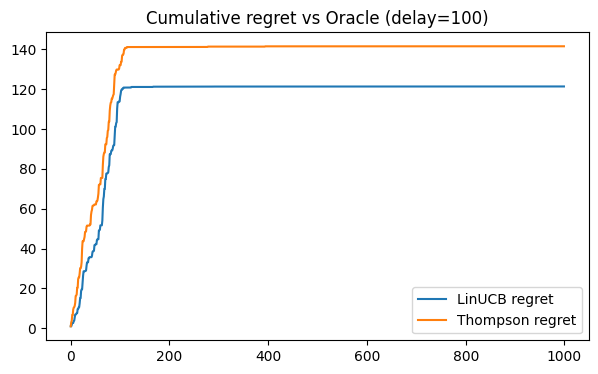

Final Δregret (delay=100 − delay=0)
LinUCB   : 108.22024910929983
Thompson : 118.99168488127194


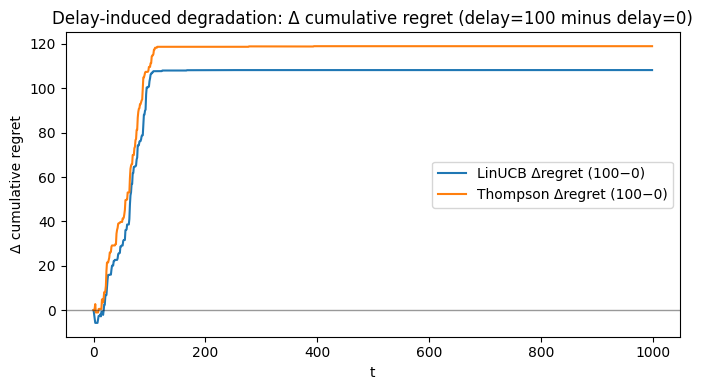

In [1]:
import os
import sys
from pathlib import Path
import numpy as np

# robustly import LinearUCBAgent
here = Path.cwd()
candidates = [here, *here.parents]
linucb_path = None
for base in candidates:
    if (base / "Day_1" / "linucb.py").exists():
        linucb_path = base / "Day_1"
        break
if linucb_path is None:
    raise FileNotFoundError("Could not find Day_1/linucb.py from cwd.")
sys.path.append(str(linucb_path))
from linucb import LinUCBAgent


class LinearThompson:
    """
    Linear Thompson Sampling with Gaussian prior/posterior.
    At each round, sample theta ~ N(mu, Sigma) where
    
      mu = A_inv @ b
      Sigma = A_inv

    and select arm a = argmax_{a} x_a.T @ theta,
    updating with: 
      A_inv <– Sherman-Morrison(A_inv, x, sigma^2)
      b <– b + (r / sigma^2) * x

    Parameters
    ----------
    d : int
        Dimensionality of the feature vectors.
    lam : float, optional
        Regularization parameter. Default is 1.0.
    sigma : float, optional
        Assumed standard deviation of the reward noise. Default is 0.5.

    Attributes
    ----------
    A_inv : ndarray of shape (d, d)
        Inverse of the precision matrix for the posterior distribution.
    b : ndarray of shape (d,)
        Weighted sum of observed rewards times features (scaled by 1/sigma^2).
    """

    def __init__(self, d, lam=1.0, sigma=0.5):
        self.d = int(d)
        self.lam = float(lam)
        self.sigma = float(sigma)

        self.A_inv = (1.0 / self.lam) * np.eye(self.d, dtype=np.float64)
        self.b = np.zeros(self.d, dtype=np.float64)

    def sample_theta(self, rng):
        mean = self.A_inv @ self.b
        cov = self.A_inv
        return rng.multivariate_normal(mean, cov)

    def select_arm(self, X, rng):
        theta = self.sample_theta(rng)
        scores = X @ theta
        return int(np.argmax(scores))

    def update(self, x, r):
        """Update the Gaussian posterior after observing reward r for features x.

        We maintain A_inv = (lam*I + (1/sigma^2) * sum_j x_j x_j^T)^(-1) and
        b = (1/sigma^2) * sum_j r_j x_j. After a new (x, r):

          A <- A + (1/sigma^2) * x x^T
          b <- b + (r/sigma^2) * x

        Since we store A_inv directly, we apply the Sherman-Morrison rank-1 inverse
        update. Writing u = sqrt(1/sigma^2) * x:

          (A + u u^T)^(-1) = A_inv - (A_inv u u^T A_inv) / (1 + u^T A_inv u)

        In code we compute z = A_inv @ x once, so the update uses outer(z, z).
        """
        x = np.asarray(x, dtype=np.float64).reshape(-1)
        scale = 1.0 / (self.sigma ** 2)

        # z = A_inv @ x appears because we're updating the inverse directly.
        z = self.A_inv @ x
        denom = 1.0 + scale * float(x @ z)
        self.A_inv -= (scale * np.outer(z, z)) / denom
        self.b += scale * float(r) * x


def block_features(X):
    """Turn (K, d) contexts into (K, K*d) block features."""
    K, d = X.shape
    Xb = np.zeros((K, K * d), dtype=np.float64)
    # Put each arm's context in its own block so one linear model learns separate params per arm.
    for a in range(K):
        Xb[a, a * d : (a + 1) * d] = X[a]
    return Xb


def run_bandit(agent, contexts, true_theta, noise, delay, rng):
    """Simulate a bandit with delayed feedback.
    
    Args:
        agent: Bandit algorithm (LinUCB or Thompson Sampling)
        contexts: (T, K, d) array of context vectors for each arm at each timestep
        true_theta: (K, d) array of true reward parameters per arm
        noise: (T,) array of observation noise for each timestep
        delay: Number of timesteps before reward feedback is observed
        rng: Random number generator for Thompson Sampling
    """
    T, K, d = contexts.shape
    pending = []  # Queue of delayed rewards: (delivery_time, features, reward)
    rewards = np.zeros(T, dtype=np.float64)

    for t in range(T):
        ready = [p for p in pending if p[0] <= t]  # Rewards ready to be observed
        pending = [p for p in pending if p[0] > t]  # Rewards still in transit
        for _, x_big, r_obs in ready:
            agent.update(x_big, r_obs)  

    
        X = contexts[t]  # (K, d) context matrix for this timestep
        Xb = block_features(X)  # (K, K*d) block-diagonal feature representation

        # Select arm using agent's policy
        if isinstance(agent, LinearThompson):
            a = agent.select_arm(Xb, rng)  # TS needs rng for posterior sampling
        else:
            a = agent.select_arm(Xb)  # UCB is deterministic

        r = float(X[a] @ true_theta[a] + noise[t])
        rewards[t] = r
        
        deliver_at = t + delay
        pending.append((deliver_at, Xb[a], r))

    return rewards


def oracle_rewards(contexts, true_theta, noise):
    """Compute rewards for an oracle that always selects the best arm."""
    T, K, d = contexts.shape
    rewards = np.zeros(T, dtype=np.float64)
    for t in range(T):
        X = contexts[t]
        exp_r = np.sum(X * true_theta, axis=1)
        a_star = int(np.argmax(exp_r))
        rewards[t] = float(exp_r[a_star] + noise[t])
    return rewards


def simulate(delay=100, T=1000, K=3, d=5, seed=0):
    """Run LinUCB, Thompson Sampling, and oracle on synthetic bandit data."""
    rng = np.random.default_rng(seed)
    contexts = rng.normal(size=(T, K, d))
    true_theta = rng.normal(size=(K, d))
    noise = rng.normal(scale=0.1, size=T)

    D = K * d 
    linucb = LinUCBAgent(d=D, alpha=0.1, lam=1.0)
    thompson = LinearThompson(d=D, lam=1.0, sigma=0.1)

    r_ucb = run_bandit(linucb, contexts, true_theta, noise, delay, rng)
    r_ts = run_bandit(thompson, contexts, true_theta, noise, delay, rng)
    r_oracle = oracle_rewards(contexts, true_theta, noise)

    return r_ucb, r_ts, r_oracle


r_ucb_0, r_ts_0, r_oracle_0 = simulate(delay=0)
r_ucb_100, r_ts_100, r_oracle_100 = simulate(delay=100)

print("Avg reward (last 200 steps)")
print("LinUCB delay=0  :", np.mean(r_ucb_0[-200:]))
print("LinUCB delay=100:", np.mean(r_ucb_100[-200:]))
print("TS delay=0      :", np.mean(r_ts_0[-200:]))
print("TS delay=100    :", np.mean(r_ts_100[-200:]))

# Quick plot
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 3, figsize=(15, 4), sharey=True)

axes[0].plot(np.cumsum(r_oracle_100), label="Oracle")
axes[0].plot(np.cumsum(r_ucb_100), label="LinUCB")
axes[0].set_title("LinUCB vs Oracle (delay=100)")
axes[0].legend()

axes[1].plot(np.cumsum(r_oracle_100), label="Oracle")
axes[1].plot(np.cumsum(r_ts_100), label="Thompson")
axes[1].set_title("TS vs Oracle (delay=100)")
axes[1].legend()

axes[2].plot(np.cumsum(r_oracle_100), label="Oracle")
axes[2].plot(np.cumsum(r_ucb_100), label="LinUCB")
axes[2].plot(np.cumsum(r_ts_100), label="Thompson")
axes[2].set_title("Both vs Oracle (delay=100)")
axes[2].legend()

plt.tight_layout()
plt.show()

# Regret plot
regret_ucb = np.cumsum(r_oracle_100 - r_ucb_100)
regret_ts = np.cumsum(r_oracle_100 - r_ts_100)

plt.figure(figsize=(7, 4))
plt.plot(regret_ucb, label="LinUCB regret")
plt.plot(regret_ts, label="Thompson regret")
plt.title("Cumulative regret vs Oracle (delay=100)")
plt.legend()
plt.show()

# Delay-degradation plot: how much worse is delay=100 vs delay=0?
# Δregret(t) = regret_delay100(t) - regret_delay0(t)

regret_ucb_0 = np.cumsum(r_oracle_0 - r_ucb_0)
regret_ucb_100 = np.cumsum(r_oracle_100 - r_ucb_100)
delta_regret_ucb = regret_ucb_100 - regret_ucb_0

regret_ts_0 = np.cumsum(r_oracle_0 - r_ts_0)
regret_ts_100 = np.cumsum(r_oracle_100 - r_ts_100)
delta_regret_ts = regret_ts_100 - regret_ts_0

print("Final Δregret (delay=100 − delay=0)")
print("LinUCB   :", float(delta_regret_ucb[-1]))
print("Thompson :", float(delta_regret_ts[-1]))

import matplotlib.pyplot as plt

plt.figure(figsize=(7, 4))
plt.plot(delta_regret_ucb, label="LinUCB Δregret (100−0)")
plt.plot(delta_regret_ts, label="Thompson Δregret (100−0)")
plt.axhline(0.0, color="k", linewidth=1, alpha=0.4)
plt.title("Delay-induced degradation: Δ cumulative regret (delay=100 minus delay=0)")
plt.xlabel("t")
plt.ylabel("Δ cumulative regret")
plt.legend()
plt.tight_layout()
plt.show()



In [6]:
# Percent performance drop due to delay, per algorithm
# drop = (performance_no_delay - performance_with_delay) / performance_no_delay
# Here performance = total reward over T (equivalently average reward, since T is fixed).

delay = 100
seeds = range(50)

drop_ucb = []
drop_ts = []

for seed in seeds:
    r_ucb_0, r_ts_0, _ = simulate(delay=0, seed=seed)
    r_ucb_d, r_ts_d, _ = simulate(delay=delay, seed=seed)

    perf_ucb_0 = float(np.sum(r_ucb_0))
    perf_ucb_d = float(np.sum(r_ucb_d))
    perf_ts_0 = float(np.sum(r_ts_0))
    perf_ts_d = float(np.sum(r_ts_d))

    drop_ucb.append((perf_ucb_0 - perf_ucb_d) / perf_ucb_0)
    drop_ts.append((perf_ts_0 - perf_ts_d) / perf_ts_0)

drop_ucb = np.asarray(drop_ucb)
drop_ts = np.asarray(drop_ts)

diff_drop = drop_ts - drop_ucb

print(f"N seeds = {len(drop_ucb)}")
print(f"mean %drop LinUCB: {100*drop_ucb.mean():.2f}% (median {100*np.median(drop_ucb):.2f}%)")
print(f"mean %drop TS    : {100*drop_ts.mean():.2f}% (median {100*np.median(drop_ts):.2f}%)")
print(f"mean(TS%drop - UCB%drop): {100*diff_drop.mean():.2f}%")



N seeds = 50
mean %drop LinUCB: 9.93% (median 9.87%)
mean %drop TS    : 10.13% (median 10.15%)
mean(TS%drop - UCB%drop): 0.19%


# Exercise 3

 In an action-centered bandit formulation, explain how separating $f(x)$ (context baseline) from $\delta(x,a)$ (action effect) can improve learning. If one arm is overall best for all users but another arm is slightly better for a small segment, how would an action-centered approach help detect the latter? What does this imply for personalization in Sqwish’s setting (e.g. one prompt is usually best, but a different prompt works better for a niche user group)?

## Solution

Example:

- Let $x$ encode user segment: $x=0$ for thrift shoppers and $x=1$ for affluent users.
- True reward model: $r(x,a)=f(x)+\delta(x,a)+\epsilon$.
- Baseline (context) effect is large: $f(0)=0.1$, $f(1)=0.8$.
- Prompt A (default): $\delta(x,A)=0$.
- Prompt B (niche win): $\delta(0,B)=+0.05$, $\delta(1,B)=-0.01$.

Raw rewards are dominated by the baseline gap ($0.7$ between segments), so a naive comparison mainly learns “affluent users buy more,” and the small thrift-only lift from prompt B is easy to miss. Action-centering estimates $\hat f(x)$ from pooled data, then models the residuals $r-\hat f(x)$ to learn $\delta(x,a)$. On residuals, prompt B shows a clear positive effect for thrift users and a slight negative effect for affluent users, even with noise $\epsilon\sim\mathcal{N}(0,\sigma^2)$.


More rigorous: if $r(x,a)=f(x)+\delta(x,a)+\epsilon$ with $\mathbb{E}[\epsilon\mid x,a]=0$, then learning $\delta$ from raw $r$ faces variance $\mathrm{Var}(r\mid x,a)=\mathrm{Var}(f(x)\mid x)+\mathrm{Var}(\epsilon\mid x,a)$, where the first term can be large across $x$. Action-centering estimates $\hat f(x)$ and uses residuals $\tilde r=r-\hat f(x)$, so $\mathbb{E}[\tilde r\mid x,a]=\delta(x,a)$ and $\mathrm{Var}(\tilde r\mid x,a)\approx\mathrm{Var}(\epsilon\mid x,a)$ if $\hat f$ is accurate. This reduces noise in the reward proxy used by UCB/TS, tightening confidence intervals on $\delta$ and increasing power to detect small, segment-specific effects.